# Ejercicio 2

## Jose Alejandro Tenorio Chavez 
## Numero de contro : 20120161 

### 1. Muestre la información del dataset, muestre qué datos son numéricos y cuáles son de tipo objeto.


In [3]:
1# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("books_simple_dataset.csv")

# 1. Muestre la información del dataset, muestre qué datos son numéricos y cuáles son de tipo objeto.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    98 non-null     object 
 1   author  87 non-null     object 
 2   rating  99 non-null     float64
 3   year    99 non-null     float64
 4   genre   99 non-null     object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB
None


### 2. Nuevamente contabilice la cantidad de datos nulos por columna.

In [4]:
1# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("books_simple_dataset.csv")

print(df.isnull().sum())


name       2
author    13
rating     1
year       1
genre      1
dtype: int64


### 3. Haga un límite y muestre qué columnas superan ese límite (para el tratamiento de nulos).

In [7]:
1# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("books_simple_dataset.csv")


# 3. Haga un límite y muestre qué columnas superan ese límite (para el tratamiento de nulos).
umbral = 2 # Puedes ajustar este umbral según tus necesidades
columnas_con_nulos = df.columns[df.isnull().sum() > umbral]
print("Columnas con más de {} datos nulos:".format(umbral))
print(columnas_con_nulos)

Columnas con más de 2 datos nulos:
Index(['author'], dtype='object')


### 4. Para las columnas que no superen el límite, elimine los datos nulos.

### 5. Si alguna columna sigue con datos nulos después de la eliminación, proceda a hacer la imputación usando la moda.

In [20]:
1# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


umbral = 2 # Puedes ajustar este umbral según tus necesidades
columnas_con_nulos = df.columns[df.isnull().sum() > umbral]

# 4. Para las columnas que no superen el límite, elimine los datos nulos.
columnas_sin_nulos = df.columns[df.isnull().sum() <= umbral]
df = df.dropna(subset=columnas_sin_nulos)

# 5. Si alguna columna sigue con datos nulos después de la eliminación, proceda a hacer la imputación usando la moda.
columnas_con_nulos_despues_eliminar = df.columns[df.isnull().sum() > 0]
for columna in columnas_con_nulos_despues_eliminar:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

### 6. Para las columnas categóricas, muestre un diagrama de distribución (tipo histograma, usando displot) y haga su análisis al respecto.

D:\programas\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


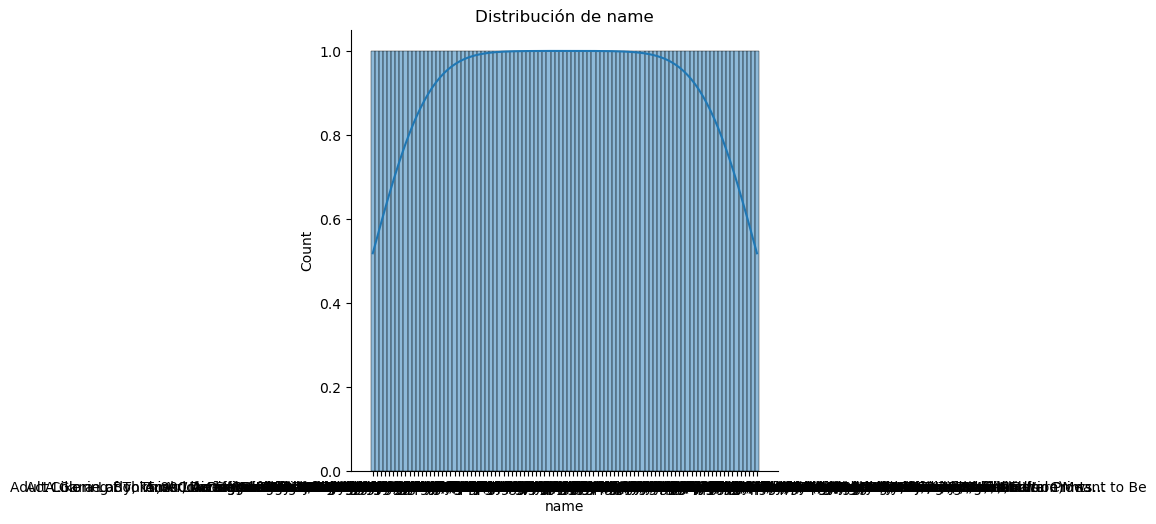

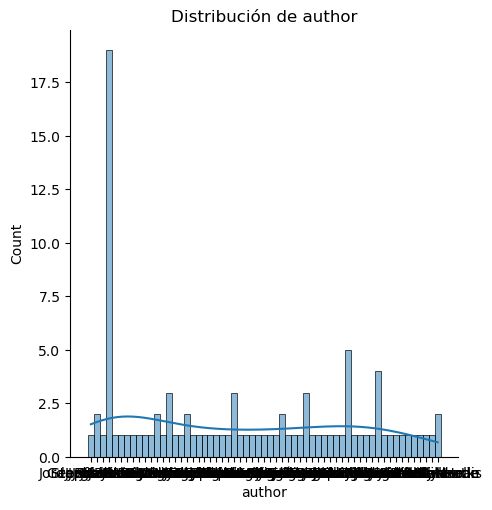

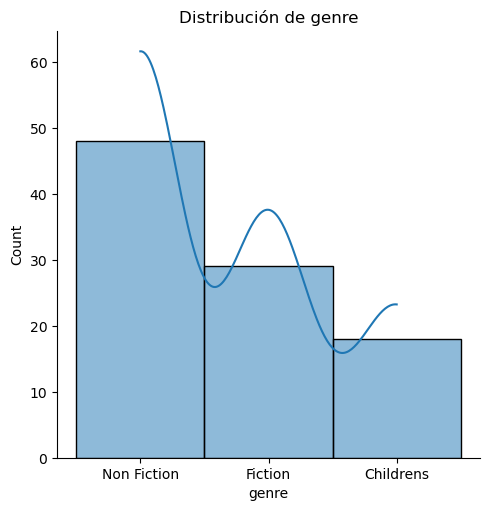

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Para las columnas categóricas, muestre un diagrama de distribución (tipo histograma, usando displot) y haga su análisis al respecto.
columnas_categoricas = df.select_dtypes(include='object').columns
for columna in columnas_categoricas:
    sns.displot(df[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

### los diagramas en general se muestran de manera correcta y son faciles de entender menos por el de Autores que al tener tantos datos no es legible 

### 7. Para las columnas numéricas, muestre un diagrama tipo boxplot y haga su análisis al respecto.

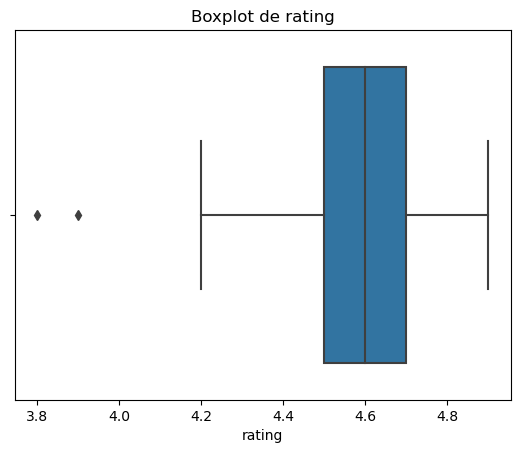

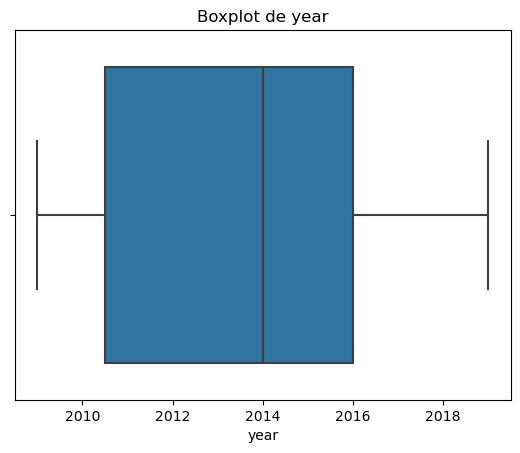

In [15]:
# 7. Para las columnas numéricas, muestre un diagrama tipo boxplot y haga su análisis al respecto.
columnas_numericas = df.select_dtypes(include='number').columns
for columna in columnas_numericas:
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

### En esto se diagramas podemos observar que tenemos algunos datos anomalos en el dataframe

## 8. Si una columna se puede categorizar, hágalo y explique el porqué se puede (o no) hacer.

In [21]:
# 8. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vamos a categorizar la columna genero .
df['genre'] = df['genre'].astype('category')


#### Decidi categorizar la columna de genre debido a que creo que es la mas adecuada para analisis especificos 

## 9. Con las columnas que hayan sido categorizadas, use el one-hot encoder de pandas para obtener las columnas numéricas (pd.get_dummies), luego concatene ese dataframe al dataframe original. 
## 10. Haga un diagrama de la matriz de correlaciones y responda:

In [29]:
# 9.  
columnas_categorizadas = df.select_dtypes(include='category').columns
df = pd.concat([df, pd.get_dummies(df[columnas_categorizadas])], axis=1)

# 10.
correlation_matrix = df.corr(numeric_only=True)

# a. ¿Qué columnas están más correlacionadas a rating?
print("Columnas más correlacionadas a 'rating':")
print(correlation_matrix['rating'].sort_values(ascending=False).head(5))

# b. ¿Qué columnas están menos correlacionadas a rating?
print("Columnas menos correlacionadas a 'rating':")
print(correlation_matrix['rating'].sort_values(ascending=True).head(5))

# c. ¿Hay alguna correlación inversa?
print("Correlaciones inversas a 'rating':")
print(correlation_matrix[correlation_matrix['rating'] < 0]['rating'])

Columnas más correlacionadas a 'rating':
rating             1.00000
genre_Childrens    0.49903
genre_Childrens    0.49903
genre_Childrens    0.49903
genre_Childrens    0.49903
Name: rating, dtype: float64
Columnas menos correlacionadas a 'rating':
genre_Fiction   -0.321052
genre_Fiction   -0.321052
genre_Fiction   -0.321052
genre_Fiction   -0.321052
genre_Fiction   -0.321052
Name: rating, dtype: float64
Correlaciones inversas a 'rating':
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
genre_Fiction       -0.321052
genre_Non Fiction   -0.095428
Name: rating, dtype: float64


## 11. Siguiendo el análisis de boxplot, identifique si hay datos anómalos, si los hay, haga el procedimiento adecuado para eliminarlos, use el rango intercuartílico.

In [30]:
# 11
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    df = df[~df.index.isin(outliers.index)]

## 12. Muestre nuevamente el boxplot y un displot para las columnas que hayan sido tratadas y haga su análisis.

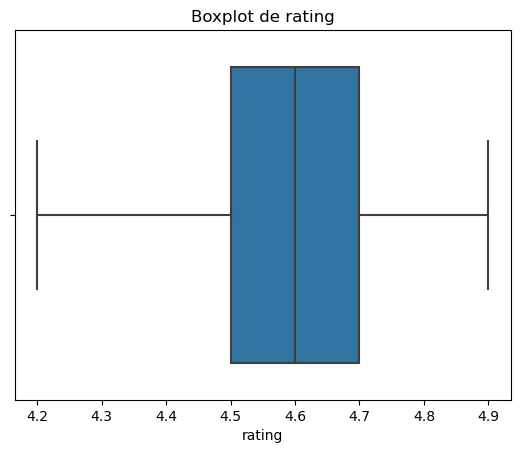

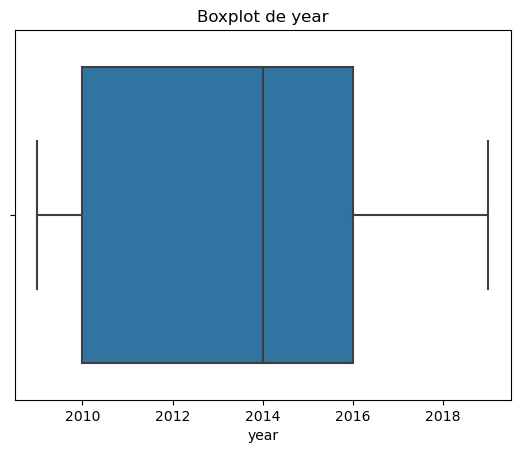

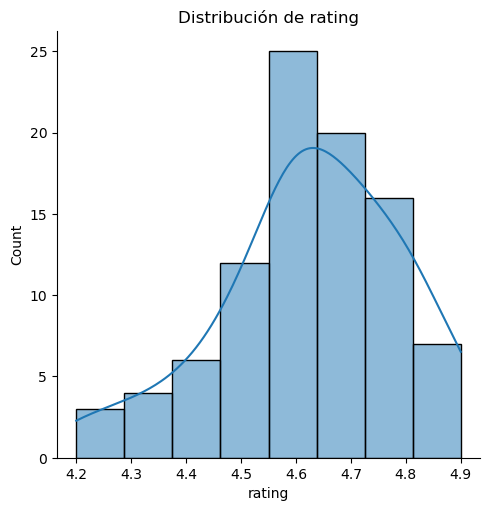

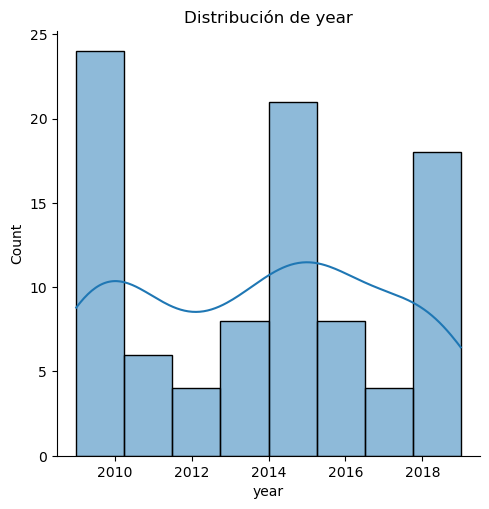

In [31]:
# 12.
for columna in columnas_numericas:
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

for columna in columnas_numericas:
    sns.displot(df[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

### Como se puede ver en los nuevos boxplot y displot ahora ya no contamos con datos anomalos dentro del dataframe 